SCRAPING

In [43]:
# !pip3.11 install google_play_scraper

In [44]:
# !pip3.11 install matplotlib
# !pip3.11 install pandas
# !pip3.11 install numpy
# !pip3.11 install seaborn
# !pip3.11 install nltk

In [45]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter

In [46]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/ameet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ameet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ameet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
#com.cloudtradetech.sky
g_reviews = reviews_all(
        "com.hsl.investright",
        sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.NEWEST
    )

In [21]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
df=g_df2

In [22]:
df.head(10)

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion
0,Google Play,1f1ef1b8-8507-4f79-b309-9c1d94c7a6fb,Rajendra Khator,None,I started using this app day one it launched. ...,1,65,2023-05-29 15:03:18,"Dear Rajendra, Sorry about the inconvenience. ...",2023-05-29 17:30:25,1.0.0
1,Google Play,cb6f8607-d6a4-40a8-9fcc-76090187f11d,Daman Raaj,None,Biggest Upgrade in this app was the smooth bio...,4,42,2023-05-12 22:16:42,"Dear Daman, Thank you for your review. Sorry a...",2023-05-13 16:54:19,1.0.0
2,Google Play,0d8de101-07b4-47bf-bda5-f8c66d86bec6,Rahul Nema,None,Better and user friendly as compared to hdfc s...,4,66,2023-04-18 15:33:58,"Dear Rahul, Thank you for your valuable feedback.",2023-04-24 15:21:55,1.0.0
3,Google Play,26f11601-e6f7-42b7-8862-7484efecf80f,Pradeep Bhatt,None,Lightweight app as compare to previous one. Im...,3,10,2023-04-25 18:27:44,"Dear Pradeep, In order to address your concern...",2023-04-26 18:48:01,1.0.0
4,Google Play,a308caaa-24a3-488c-b5c9-0a3e66846d31,Abhijit Mandal,None,"Pathetic. Most of the time, I can't login. Som...",1,21,2023-04-17 10:34:36,"Dear Abhijit, In order to address your concern...",2023-03-28 18:13:06,1.0.0
5,Google Play,74f68b02-0e63-41dd-8439-b4bea68204a2,Sidharth Chauhan,None,The Data migration from HDFC Securities applic...,1,6,2023-05-09 10:54:06,"Dear Sidharth, We are really sorry for the bad...",2023-05-09 17:09:15,1.0.0
6,Google Play,44cbfaef-5221-4689-9b37-24c8088cfc14,Dibyendu Karmakar,None,Average cost of mutual fund units should be di...,3,7,2023-04-12 01:14:36,None,NaT,1.0.0
7,Google Play,6b20fb4f-c214-4eab-966b-444f21e00b38,aman jain,None,Looks like a Proof of concept version of exist...,1,1,2023-06-15 11:22:03,"Dear Aman,\nWe wish to inform you that Option ...",2023-06-15 17:57:03,1.0.0
8,Google Play,4ad5890b-9b21-49a5-bc5a-58156a605cdc,Partha Goon,None,"A really great app by HDFC,but when I tried to...",3,0,2023-05-09 17:57:53,"Dear Partha, Sorry about the inconvenience.Cur...",2023-05-11 10:11:25,1.0.0
9,Google Play,cc6baed7-96c8-43da-a824-ed0c6f1b835d,Manohar Wagh,None,The app is slow and frequently ask for passwor...,1,3,2023-05-08 10:11:53,"Dear Manohar, , In order to address your conce...",2023-05-09 17:00:07,1.0.0


In [23]:
df.shape

(814, 11)

In [24]:
df.drop('review_title',axis=1,inplace=True)
df.drop('developer_response',axis=1,inplace=True)
df.drop('developer_response_date',axis=1,inplace=True)

In [25]:
##### To obtain current days reviews only ######
# today=str(date.today())
# today
# df_filtered = df[df['review_date'].dt.strftime('%Y-%m-%d') == today]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   source              814 non-null    object        
 1   review_id           814 non-null    object        
 2   user_name           814 non-null    object        
 3   review_description  814 non-null    object        
 4   rating              814 non-null    int64         
 5   thumbs_up           814 non-null    int64         
 6   review_date         814 non-null    datetime64[ns]
 7   appVersion          715 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 51.0+ KB


In [47]:
ratings=df['rating'].value_counts().sort_index()
print(ratings)

rating
1    115
2     22
3     40
4     30
Name: count, dtype: int64


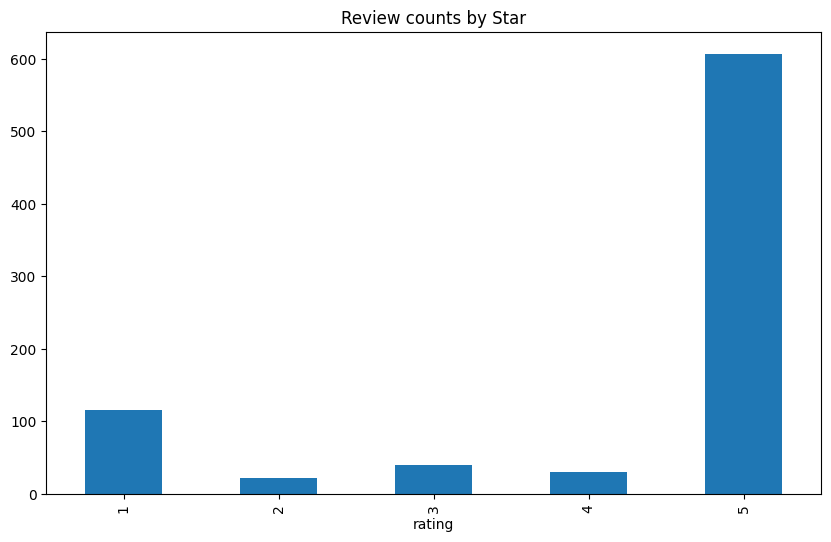

In [28]:
ratings.plot(kind='bar',title='Review counts by Star',figsize=(10,6))
plt.show()

In [29]:
df=df[df['rating']<=4]

In [30]:
comments =" ".join(df['review_description'])
words =word_tokenize(comments)
#comments

'I started using this app day one it launched. It was a horrific experience for me. The data for my investment was different on old and new app. Mutual fund data was incorrect. I tried to place a order and it error out. I raised issue to hdfc customer care and the fixed one issue but they never provided update to mutual fund data issue till today. This is sefull that sucha big brokerage house released a half cooked app in market without even thinking about customers. I had very bad experience. Biggest Upgrade in this app was the smooth biometric login. Much better than the securities app. Still has some bugs like being able to login even after password expired. Navigation is not working as expected. Pressing back makes me logout instead of going back to previous screen or to home page. Better and user friendly as compared to hdfc security application. One suggestion, open and net position can be displayed in Portfolio tab rather than Order tab. You may also provide set as default choic

In [31]:
def clean_words(new_tokens, custom_stop_words={ 'hdfc', 'securities','hdfc securities','please','able','bank'}):
    new_tokens = [t.lower() for t in new_tokens]
    stop_words = set(stopwords.words('english'))
    if custom_stop_words:
        stop_words.update(custom_stop_words)
    new_tokens = [t for t in new_tokens if t not in stop_words]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens


In [32]:
cleaned_words = clean_words(words)

In [33]:
bow = Counter(cleaned_words)
bow2 =Counter(ngrams(cleaned_words,2))
bow3=Counter(ngrams(cleaned_words,3))

In [34]:
word_freq = pd.DataFrame(bow.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_pairs =pd.DataFrame(bow2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(bow3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)

In [35]:
word_freq

,word,frequency
2,app,162
177,option,43
47,login,38
18,order,37
133,show,33
...,...,...
601,evertime,1
602,oneplus,1
211,large,1
604,illegible,1


In [36]:
word_pairs

,pairs,frequency
136,"(old, app)",12
181,"(app, show)",8
869,"(font, size)",8
83,"(user, friendly)",7
1184,"(server, error)",7
...,...,...
916,"(generated, password)",1
917,"(password, every)",1
918,"(time, login)",1
920,"(app, earlier)",1


In [37]:
trigrams

,trigrams,frequency
1759,"(internal, server, error)",6
909,"(increase, font, size)",4
472,"(invest, right, app)",4
774,"(something, went, wrong)",3
908,"(option, increase, font)",3
...,...,...
952,"(allow, pasting, copied)",1
953,"(pasting, copied, value)",1
954,"(copied, value, remember)",1
955,"(value, remember, length)",1


In [38]:
# fig, axes = plt.subplots(3,1,figsize=(8,20))
# sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30),color='blue')
# sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30),color='blue')
# sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30),color='blue')

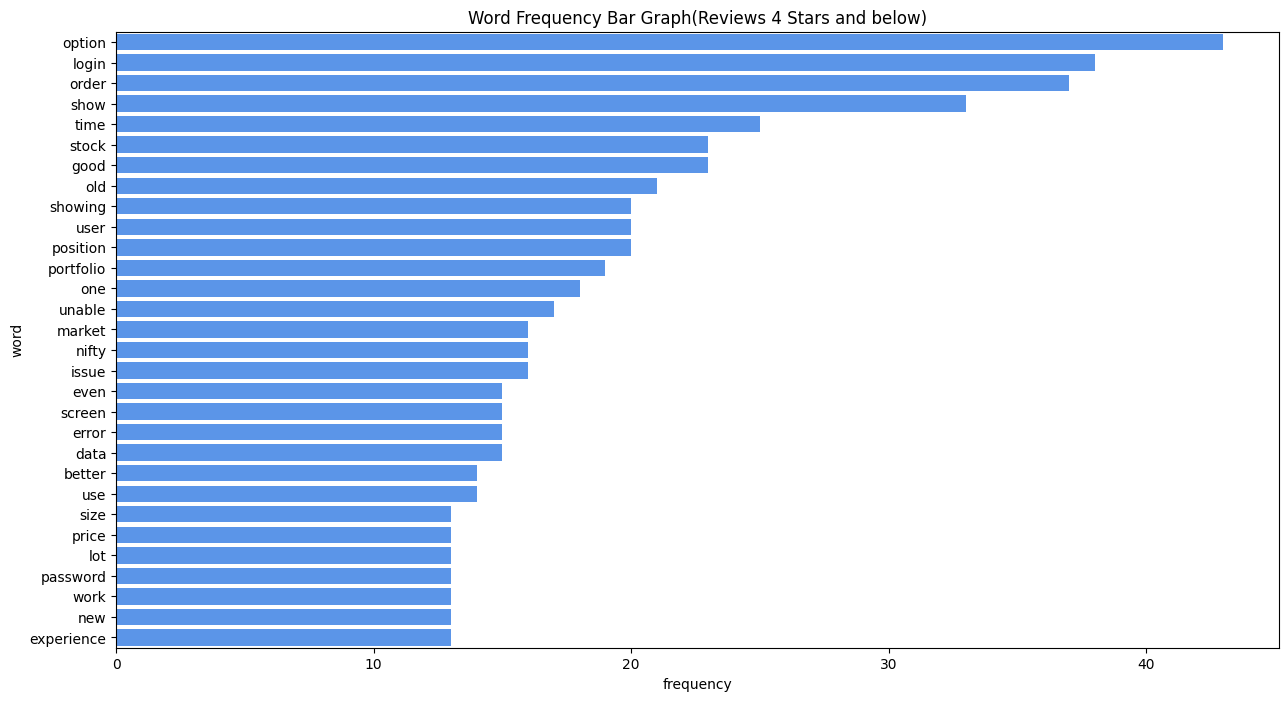

In [39]:
word_freq=word_freq[word_freq['word']!='app']
fig, axes = plt.subplots(figsize=(15, 8))
sns.barplot(ax=axes, x='frequency', y='word', data=word_freq.head(30), color='#4491FF')
plt.title('Word Frequency Bar Graph(Reviews 4 Stars and below)')
plt.show()

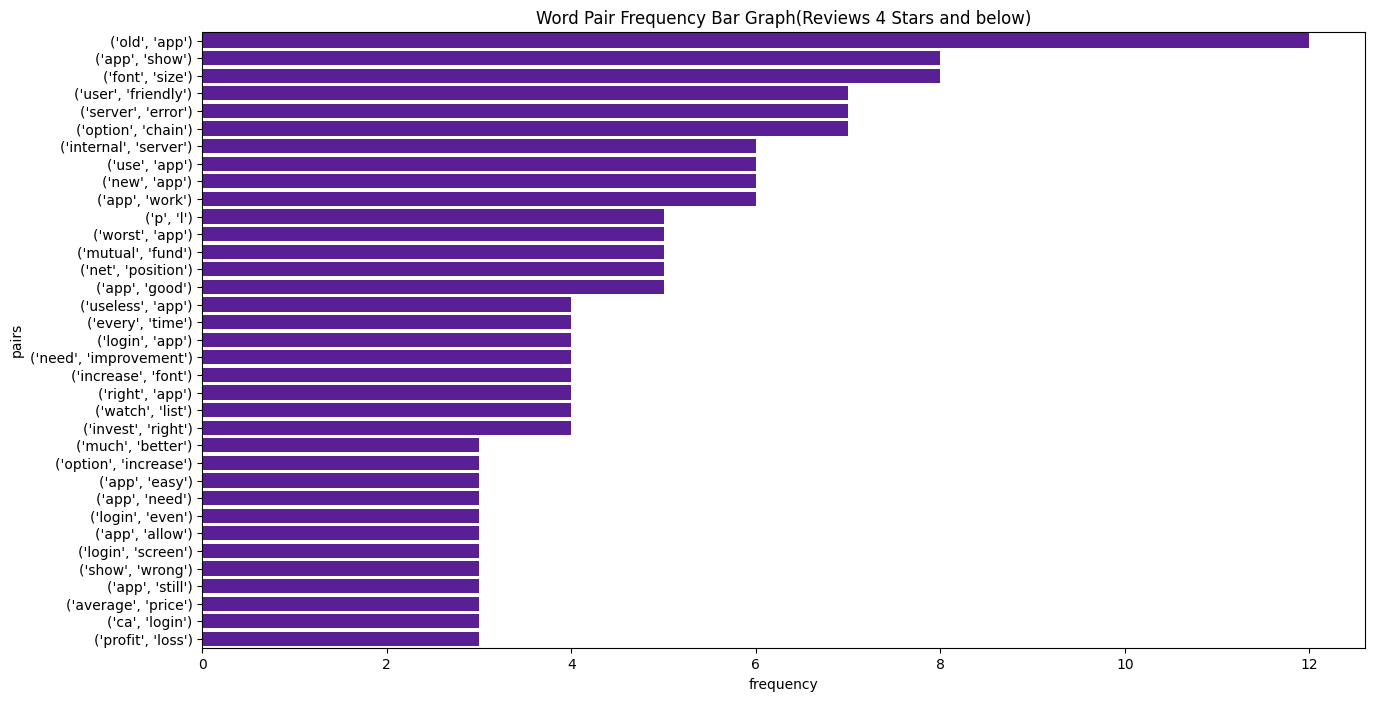

In [40]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.barplot(ax=axes, x='frequency', y='pairs', data=word_pairs.head(35), color='#5A0BA9')
plt.title('Word Pair Frequency Bar Graph(Reviews 4 Stars and below)')

plt.show()

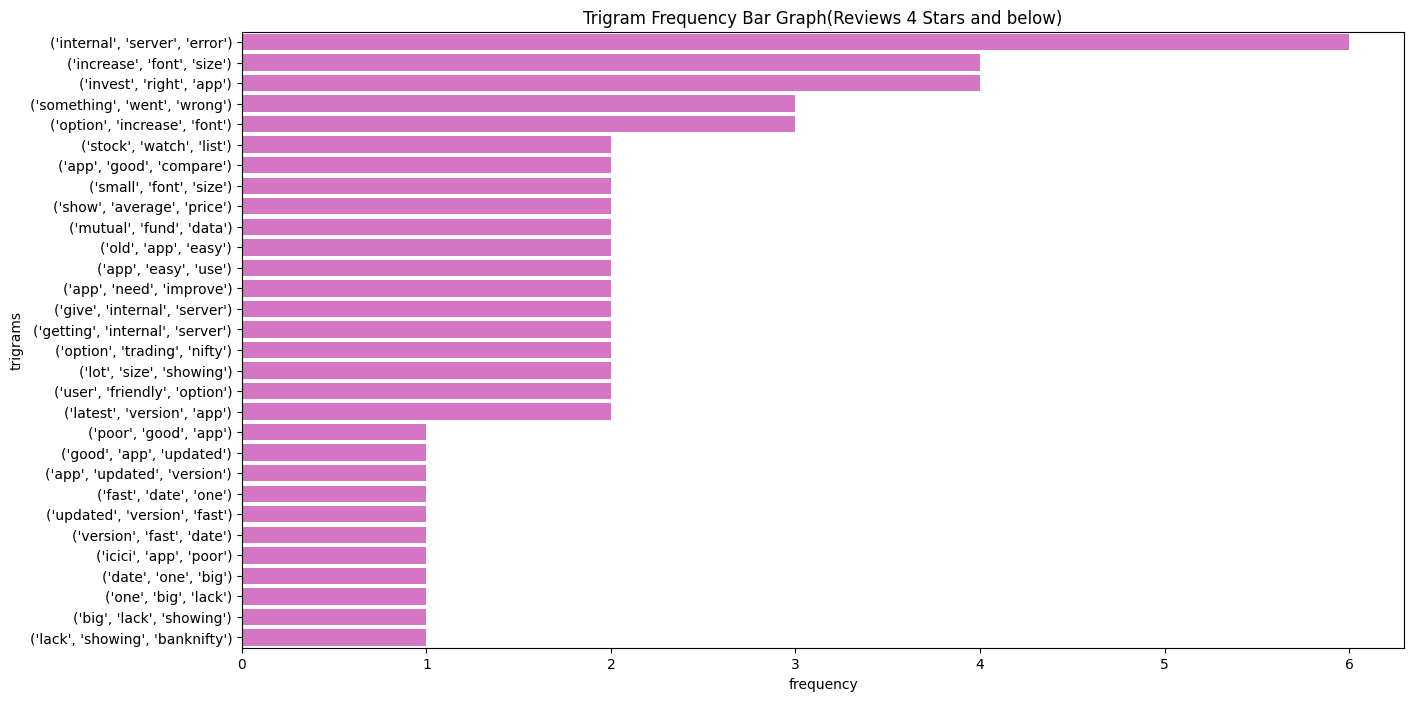

In [41]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.barplot(ax=axes, x='frequency', y='trigrams', data=trigrams.head(30), color='#E466CD')
plt.title('Trigram Frequency Bar Graph(Reviews 4 Stars and below)')
plt.show()

In [55]:
import streamlit as st

x = st.slider('x')  # 👈 this is a widget
st.write(x, 'squared is', x * x)

2023-06-23 14:48:37.484 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2023-06-23 14:48:37.585 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
